<a href="https://colab.research.google.com/github/alagarde-bit/Computer-Vision/blob/main/lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 4466 Computer Vision
## Lab 3 - xforms
### 2/7/2022
### Alex Lagarde


In [1]:
# Reading in appropriate libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

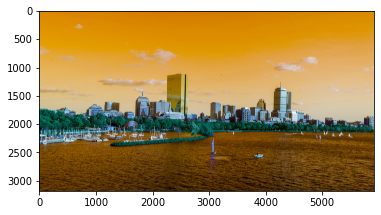

In [2]:
img = cv2.imread('my_image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
b,g,r = cv2.split(img)
new_img = cv2.merge((r,g,b))
plt.imshow(new_img)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


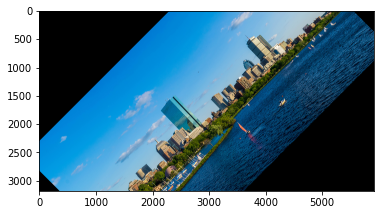

In [3]:
# 2. Geometric Transformation
def translate_image(img, x_off, y_off):
  image = img
  i = cv2.imread(image)
  r,c = i.shape[:2]
  T = np.array([[1, 0, x_off],
                [0, 1, y_off]], np.float)
  translate = cv2.warpAffine(i, T, (c,r))
  return translate

def rotate_image(img, rot):
  image = img
  i = cv2.imread(image)
  r,c = i.shape[:2]
  img_center = ((c - 1) / 2, (r - 1) / 2)
  T = cv2.getRotationMatrix2D(img_center, rot, 1.0)
  rotate = cv2.warpAffine(i, T, (c,r))
  return rotate

translated = translate_image('my_image.jpg', -150, 100)
rotated = rotate_image('my_image.jpg', 45)
disp = cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)
plt.imshow(disp)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


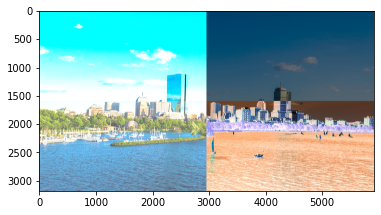

In [4]:
# 3. Increase/Decrease Contrast, Brighten, Invert Function
def four_quadrants(img):
  image = img
  i = cv2.imread(image)
  rows, cols = i.shape[:2]
  new_img = i.astype(np.float)
  # increase contrast top left
  new_img[:rows//2, :cols//2] = new_img[:rows//2, :cols//2] * 2
  # invert bottom right
  new_img[rows//2:, cols//2:] = 255 - new_img[rows//2:, cols//2:] 
  # decrease contrast top right
  new_img[:rows//2, cols//2:] = new_img[:rows//2, cols//2:] // 2
  # brighten bottom left
  new_img[rows//2:, :cols//2] =  new_img[rows//2:, :cols//2] + 100
  new_img = np.clip(new_img, 0, 255)
  new_img = new_img.astype(np.uint8)
  return new_img
  
final = four_quadrants('my_image.jpg')
final_disp = cv2.cvtColor(final, cv2.COLOR_BGR2RGB)
plt.imshow(final_disp)
plt.show()

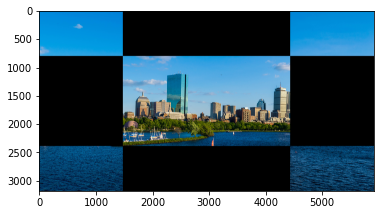

In [6]:
# 4. Masking
img = cv2.imread('my_image.jpg')
rows, cols = img.shape[:2]
# middle rectangle
mask1 = np.zeros((rows, cols), dtype = np.uint8)
mask1[rows // 4 : rows - rows // 4, cols // 4 : cols - cols // 4] = 255
# corners
mask2 = np.zeros((rows, cols), dtype = np.uint8)
# upper left corner
mask2[:rows // 4, :cols // 4] = 255
# bottom left corner
mask2[rows - rows // 4:, :cols // 4] = 255
# upper right corner 
mask2[:rows // 4, cols - cols // 4:] = 255
# bottom right corner
mask2[rows - rows // 4:, cols - cols // 4:] = 255
# combine mask1 and mask2 
mask3 = cv2.bitwise_or(mask1, mask2)
# masking image
masked = cv2.bitwise_and(img, img,
mask=mask3)
last_disp = cv2.cvtColor(masked, cv2.COLOR_BGR2RGB)
plt.imshow(last_disp)
plt.show()


